<a href="https://colab.research.google.com/github/michel-phylo/CNV_ADERA/blob/main/Adera_MAKARIOUS_exec%2Bsystem%2BCNV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!ls

 adera1.gdoc
 adera_25_may1.txt
 adera_29_june_2_10_pm
 adera_29_june_2_12_pm
 adera_29_june_4_05_pm
 adera_29_june_4_types_Macarious1.txt
 adera_29_june_5_types_Macariou2.txt
 adera_29_june_6_types_Macarious2.txt
 adera_29_june_7_types_Macarious1.txt
 adera_29_june_7_types_Macarious3.txt
 adera_30_june_9_am
 adera_30_june_9_am_pm
 adera_32
 adera+45+45
 adera_47_40
 adera_49
 adera+49+47
 adera+49+49
 adera+50+54+22
 adera_51_51
 adera_52_521
 adera_57_30
 adera_57+50
 adera_57_50
 adera+59+59+13
 adera+59+59+15
 adera_5_july_9a_am
 adera_5_july_9_am
 adera_5_july_9b_am
 adera_5_july_9c_am
 adera+60+58
 adera+60+58+14
 adera+60+60
 adera+60+60+10
 adera+63+68+10
 adera+69+74+10
 adera_6_july_9c_am_0.8_0.2_0.8_8000
 adera+70+70
 adera+86+86+15
 adera+90+80b+exec2+Makarious
 adera+90+80b+exec2+softmax+Makarious
 adera+90+80b+exec2+softplus3+Makarious
 adera+90+80b+GODLY2+MALE
 adera+90+80b+GODLY3+MALE
 adera+90+80b+GODLY4+MALE
 adera+90+80b+GODLY5+MALE
 adera+90+80b+GODLY6+MALE
 adera+9

In [ ]:
!pip3 install tensorflow

from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
from tensorflow.keras.constraints import max_norm

import pandas as pd

In [ ]:
import pandas as pd

#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g_onely_main.txt',delimiter='\t',engine='python')
first_data_adera=pd.read_table('updated_ADERA_GENES_6500_gene8g.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('updated_ADERA_GENES_6500_genec_only_main_14.txt',delimiter='\t',engine='python')
#first_data_adera=pd.read_table('Adera_Complete_data_base_10_july_v1_2_38pm.txt',delimiter=',',engine='python')

first_data_adera

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
2,A4GNT,AMP,6.0,3,138123713.0,138132390.0,3,Esophageal_Adenocarcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12980,ZUP1,HOMDEL,6.5,6,116635618.0,116668794.0,3,Prostate_Adenocarcinoma
12981,ZUP1,HOMDEL,6.3,6,116635618.0,116668794.0,3,Uveal Melanoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera1= first_data_adera.dropna(axis = 0, how ='any')
first_data_adera1
#first_data_adera2 = first_data_adera1.sort_values(by=['Freq'], ascending=[ False])
first_data_adera3 = first_data_adera1.sort_values(by=['Gene', 'Cancer_type', 'Freq'], ascending=[True, True, False])
first_data_adera3
first_data_adera4 = first_data_adera3.drop_duplicates(subset=['Gene'], keep='first')
first_data_adera4

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
0,A2ML1,AMP,6.0,12,8822621.0,8887001.0,77,Testicular_Germ_Cell_Tumors
1,A4GNT,AMP,6.8,3,138123713.0,138132390.0,3,Cervical_Squamous_Cell_Carcinoma
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
4,AADAC,AMP,8.2,3,151814073.0,151828488.0,77,Cervical_Squamous_Cell_Carcinoma
7,AADACL2,AMP,8.2,3,151733916.0,151761339.0,77,Cervical_Squamous_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12977,ZSWIM4,AMP,12.1,19,13795443.0,13832254.0,77,Serous_Ovarian_Cancer
12978,ZSWIM7,AMP,9.1,17,15976560.0,15999717.0,3,Sarcoma
12979,ZUP1,HOMDEL,8.3,6,116635618.0,116668794.0,3,Diffuse_Large B-Cell_Lymphoma
12982,ZXDC,AMP,6.1,3,126437601.0,126475891.0,3,Cervical_Squamous_Cell_Carcinoma


In [ ]:
first_data_adera["Cancer_type"].unique()

array(['Testicular_Germ_Cell_Tumors', 'Cervical_Squamous_Cell_Carcinoma',
       'Esophageal_Adenocarcinoma', 'Renal_Clear_Cell_Carcinoma',
       'Head_and_Neck_Squamous', 'Serous_Ovarian_Cancer',
       'Colorectal_Adenocarcinoma', 'Liver_Hepatocellular_Carcinoma',
       'Breast_Invasive_Ductal_Carcinoma', 'Stomach_Adenocarcinoma',
       'Uterine_Corpus_Endometrial_Carcinoma',
       'Diffuse_Large B-Cell_Lymphoma', 'Cholangiocarcinoma',
       'Uveal Melanoma', 'Bladder_Urothelial_Carcinoma', 'Sarcoma',
       'Prostate_Adenocarcinoma', 'Lung', 'Adrenocortical_Carcinoma',
       'Glioblastoma_Multiforme', 'Skin_Cutaneous_Melanoma',
       'Brain_Lower_Grade_Glioma'], dtype=object)

In [ ]:
First_data_adera3a= first_data_adera3[first_data_adera3['Cancer_type'] == 'Renal_Clear_Cell_Carcinoma']
First_data_adera3b1= first_data_adera3[first_data_adera3['Cancer_type'] == 'Bladder_Urothelial_Carcinoma']
#First_data_adera3b2= first_data_adera3[first_data_adera3['Cancer_type'] == 'Cholangiocarcinoma']
#First_data_adera3b3= first_data_adera3[first_data_adera3['Cancer_type'] == 'Stomach_Adenocarcinoma']

First_data_adera3c = pd.concat([First_data_adera3a, First_data_adera3b1])


In [ ]:
First_data_adera3c

,Gene,CNA,Freq,chromosome,start,end,strand,Cancer_type
3,AACSP1,AMP,7.3,5,178764861.0,178818435.0,3,Renal_Clear_Cell_Carcinoma
132,ADAM19,AMP,6.1,5,157395534.0,157575775.0,3,Renal_Clear_Cell_Carcinoma
160,ADAMTS2,AMP,7.3,5,179110853.0,179345461.0,3,Renal_Clear_Cell_Carcinoma
233,ADRA1B,AMP,6.1,5,159865080.0,159973012.0,77,Renal_Clear_Cell_Carcinoma
399,ANKHD1,AMP,6.1,5,140401814.0,140539856.0,77,Renal_Clear_Cell_Carcinoma
...,...,...,...,...,...,...,...,...
12844,ZNF596,HOMDEL,7.4,8,232137.0,264703.0,77,Bladder_Urothelial_Carcinoma
12851,ZNF622,AMP,7.4,5,16451519.0,16465800.0,3,Bladder_Urothelial_Carcinoma
12887,ZNF687,AMP,8.6,1,151281618.0,151292176.0,77,Bladder_Urothelial_Carcinoma
12907,ZNF703,AMP,9.6,8,37695782.0,37700019.0,77,Bladder_Urothelial_Carcinoma


In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    'chromosome': [1],
    'start': [161070998],
    'end': [161089558],
    'CNA': ['AMP'],
    'strand': [3]
}

# Create the DataFrame
df_adera_validation = pd.DataFrame(data)

# Print the DataFrame
print(df_adera_validation)


   chromosome      start        end  CNA  strand
0           1  161070998  161089558  AMP       3


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(First_data_adera3c["CNA"])
Adera_CNA= encoder.transform(First_data_adera3c["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(First_data_adera3c ['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=First_data_adera3c['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=First_data_adera3c['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=First_data_adera3c['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=First_data_adera3c['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)

Adera_freq=First_data_adera3c['Freq']
Adera_freq1=np.array(Adera_freq)
Adera_freq2=Adera_freq1.reshape(Input_net_Adera1.shape[0],1)
#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape
Output_net_Adera=First_data_adera3c[["Cancer_type"]]
Output_net_Adera
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(Output_net_Adera)
#Output_net_Adera1 = encoder.transform(Output_net_Adera)

#Output_net_Adera1 = np_utils.to_categorical(Output_net_Adera1,num_classes=3)
#Output_net_Adera1



encoder = LabelEncoder()
encoder.fit(First_data_adera3c[["Cancer_type"]])
Output_net_Adera1 = encoder.transform(First_data_adera3c[["Cancer_type"]])

Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:

Output_net_Adera2= np_utils.to_categorical(Output_net_Adera1 ,num_classes=k1.shape[0])

In [ ]:
Output_net_Adera2.shape
Output_net_Adera2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Input_Adera_numpy2=Input_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,8) #7 input values

Output_net_Adera3=Output_net_Adera2.reshape(Input_net_Adera1.shape[0],1,1,k1.shape[0]) #7 cancer types
Output_net_Adera3


array([[[[0., 1.]]],


       [[[0., 1.]]],


       [[[0., 1.]]],


       ...,


       [[[1., 0.]]],


       [[[1., 0.]]],


       [[[1., 0.]]]], dtype=float32)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
import numpy as np

In [ ]:
result_file = open("results_adera1.txt", "w")
result_file.write(" test_adera")
result_file.close()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras import regularizers
es_ADERA = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=300)

from random import sample

class_0_indices = np.where(Output_net_Adera3 == 0)[0]
class_1_indices = np.where(Output_net_Adera3 == 1)[0]

num_samples_class_0 = len(class_0_indices)
num_samples_class_1 = len(class_1_indices)

target_size = min(num_samples_class_0, num_samples_class_1)

undersampled_indices = np.concatenate([
    sample(class_0_indices.tolist(), target_size),
    class_1_indices
])

Input_Adera_undersampled = Input_Adera_numpy2[undersampled_indices]
Output_net_Adera_undersampled = Output_net_Adera3[undersampled_indices]




grace_model = tf.keras.Sequential([

 #tf.keras.layers.Dense(2, activation='sigmoid'),
 tf.keras.layers.Dense(2, activation='relu'),
 tf.keras.layers.Dense(2, activation='sigmoid')


      ])





optimizer_Adera=tf.keras.optimizers.Adamax(learning_rate=2*1e-3, clipnorm = .08)

grace_model.compile(optimizer=optimizer_Adera, loss='binary_crossentropy', metrics=['accuracy'])
k_adera = grace_model.fit(Input_Adera_undersampled, Output_net_Adera_undersampled, verbose=1, validation_split=0.49, epochs=90, batch_size=20, callbacks=[es_ADERA])
#k_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=200,batch_size=10, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8_adera=grace_model.fit(Input_Adera_numpy2,Output_net_Adera3,verbose=1,validation_split=0.49,epochs=350,batch_size=250, callbacks=[es_ADERA]) # TEST1_TRAIN_0.8

Epoch 1/90
50/50 [==============================] - 2s 14ms/step - loss: 0.6838 - accuracy: 0.6660 - val_loss: 0.6824 - val_accuracy: 0.6925
Epoch 2/90
50/50 [==============================] - 1s 12ms/step - loss: 0.6822 - accuracy: 0.6660 - val_loss: 0.6805 - val_accuracy: 0.6925
Epoch 3/90
50/50 [==============================] - 1s 14ms/step - loss: 0.6807 - accuracy: 0.6660 - val_loss: 0.6788 - val_accuracy: 0.6925
Epoch 4/90
50/50 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.6660 - val_loss: 0.6771 - val_accuracy: 0.6925
Epoch 5/90
50/50 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.6660 - val_loss: 0.6755 - val_accuracy: 0.6925
Epoch 6/90
50/50 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6660 - val_loss: 0.6738 - val_accuracy: 0.6925
Epoch 7/90
50/50 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.6660 - val_loss: 0.6722 - val_accuracy: 0.6925
Epoch 8/90
50/50 

3/3 [==============================] - 0s 6ms/step - loss: 0.1357 - accuracy: 0.9969


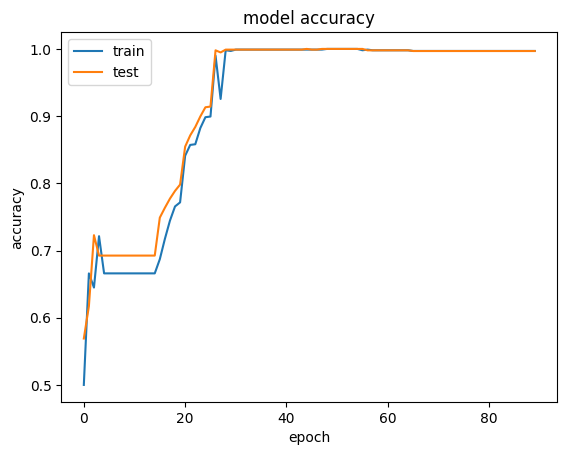

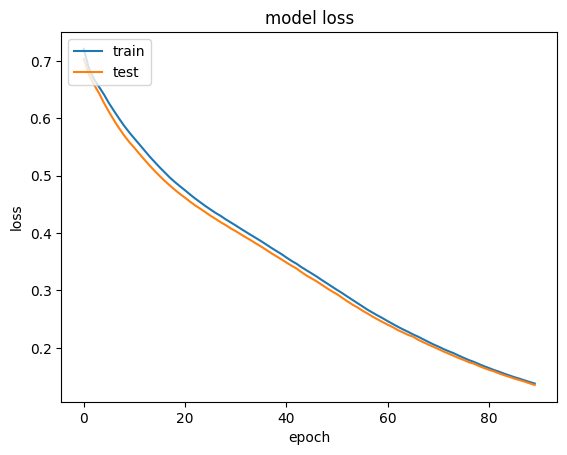

In [ ]:
#print(k_adera.history.keys())
#print(k_adera.history['val_loss'])
#print(k_adera.history['val_accuracy'])
#print(k_adera.history['mape'])
results = grace_model.evaluate(Input_Adera_numpy2,Output_net_Adera3,batch_size=400)
# summarize history for accuracy
plt.plot(k_adera.history['accuracy'])
plt.plot(k_adera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
axes = plt.gca()
#axes.set_ylim([-0.005,0.005])
plt.plot(k_adera.history['loss'])
plt.plot(k_adera.history['val_loss'])
#########################
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.title('model mape')
#plt.plot(k_adera.history['mean_squared_error'])
#plt.plot(k_adera.history['val_mape'])
#plt.plot(k_adera.history['mape'])
#plt.ylabel('mape')
#plt.xlabel('epoch')
#plt.show()
#plt.title('model mae')
#plt.plot(k_adera.history['val_mae'])
#plt.plot(k_adera.history['mae'])
#plt.show()


In [ ]:

grace_model.save("adera+99+99b+exec2+sigmoid85+86+Makarious")


In [ ]:
adera_47_40_model = tf.keras.saving.load_model("adera+99+99b+exec2+sigmoid85+86+Makarious")

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

#

First_data_adera3c["Cancer_type"].unique()
data_adera = {
    "types": First_data_adera3c["Cancer_type"].unique(),
    "values": [0, 1]
}

threshold = 0.9
num_runs = 3
mean_accuracies = []  # List to store mean accuracy values

for _ in range(num_runs):
    accuracies = []  # List to store accuracy values for each run

    for _ in range(99):
        adera_test1 = random.randint(0, Adera_chromosome4.shape[0] - 1)
        test_mac = Input_Adera_numpy2[adera_test1].reshape(1, 1, 1, 8)
        adera_result = adera_47_40_model.predict(test_mac)
        print(adera_result)
        adera_result_thresholded = (adera_result >= threshold).astype(int)
        print(adera_result_thresholded)
        adera_result5 = np.argmax(adera_result_thresholded)
        print(adera_result5)
        print(data_adera['types'][adera_result5])
        print(First_data_adera3c['Cancer_type'].iloc[adera_test1])

        if data_adera['types'][adera_result5] == First_data_adera3c['Cancer_type'].iloc[adera_test1]:
            accuracies.append(1)  # Correct prediction
        else:
            accuracies.append(0)  # Incorrect prediction

    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

std_deviation = np.std(mean_accuracies)

print("Mean Accuracy:", np.mean(mean_accuracies))
print("Standard Deviation:", std_deviation)



1/1 [==============================] - 0s 37ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 34ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 56ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 37ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 36ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 52ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Renal_Clear_Cell_Carcinoma
Renal_Clear_Cell_Carcinoma
1/1 [==============================] - 0s 36ms/step
[[[[0.09090022 0.89525306]]]]
[[[[0 0]]]]
0
Rena

In [ ]:
import pandas as pd

# Create a dictionary with the data
data = {
    'chromosome': [1],
    'start': [161070998],
    'end': [161089558],
    'CNA': ['AMP'],
    'strand': [3]
}

# Create the DataFrame
df_adera_validation = pd.DataFrame(data)

# Print the DataFrame
print(df_adera_validation)


   chromosome      start        end  CNA  strand
0           1  161070998  161089558  AMP       3


In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_adera_validation["CNA"])
Adera_CNA= encoder.transform(df_adera_validation["CNA"])

Adera_CNA1= np_utils.to_categorical(Adera_CNA,num_classes=4)
#type(first_data_adera["Freq"])
#Adera_CNA1=first_data_adera['CNA']
Adera_CNA1.shape #rember to update because there are genes written in one or more diseases.
Adera_CNA1
type(df_adera_validation['CNA'])

#Input_net_Adera = np.concatenate((Adera_freq.T,Adera_CNA1), axis=None)
#Input_net_Adera1=Input_net_Adera.reshape(5,6918).T

Input_net_Adera1=Adera_CNA1
Input_net_Adera1.shape # number of samples,number of 4 states
Adera_chromosome=df_adera_validation['chromosome']
Adera_chromosome1=np.array(Adera_chromosome)
Adera_chromosome2=Adera_chromosome1.reshape(Input_net_Adera1.shape[0],1)

Adera_start=df_adera_validation['start']
Adera_start1=np.array(Adera_start)
Adera_start2=Adera_start1.reshape(Input_net_Adera1.shape[0],1)

Adera_end=df_adera_validation['end']
Adera_end1=np.array(Adera_end)
Adera_end2=Adera_end1.reshape(Input_net_Adera1.shape[0],1)

Adera_strand=df_adera_validation['strand']
Adera_strand1=np.array(Adera_strand)
Adera_strand2=Adera_strand1.reshape(Input_net_Adera1.shape[0],1)


#normalise chromsoem numbers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_chromosome3 = Adera_chromosome2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_chromosome4= scaler.fit_transform(Adera_chromosome3)



#####normalise start values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_start3 = Adera_start2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_start4= scaler.fit_transform(Adera_start3)

####normalise end values
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_end3 = Adera_end2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_end4= scaler.fit_transform(Adera_end3)

######normalise stand
from sklearn.preprocessing import MinMaxScaler
import numpy as np
Adera_strand3 = Adera_strand2.reshape(-1, 1)
scaler = MinMaxScaler()
Adera_strand4= scaler.fit_transform(Adera_strand3)
Adera_chromosome4.shape
k1=First_data_adera3c["Cancer_type"].unique()
k1.shape[0]
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,adera_matrix), axis=1)
Adera_CNA1
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome2,Adera_start2,Adera_end2,Adera_strand2,Adera_freq2), axis=1)
Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_chromosome4,Adera_start4,Adera_end4,Adera_strand4), axis=1)
#Input_net_Adera2 = np.concatenate((Input_net_Adera1,Adera_start2,Adera_end2), axis=1)
#Input_net_Adera2=adera_matrix
Input_net_Adera2.shape

(1, 8)

In [ ]:
Input_test_Adera=Input_net_Adera2.reshape(1, 1, 1, 8)


In [ ]:
adera_47_40_model.predict(Input_test_Adera)

1/1 [==============================] - 0s 78ms/step


array([[[[1.0000000e+00, 2.8505384e-12]]]], dtype=float32)

In [ ]:
First_data_adera3c["Cancer_type"]

3          Renal_Clear_Cell_Carcinoma
132        Renal_Clear_Cell_Carcinoma
160        Renal_Clear_Cell_Carcinoma
233        Renal_Clear_Cell_Carcinoma
399        Renal_Clear_Cell_Carcinoma
                     ...             
12844    Bladder_Urothelial_Carcinoma
12851    Bladder_Urothelial_Carcinoma
12887    Bladder_Urothelial_Carcinoma
12907    Bladder_Urothelial_Carcinoma
12921    Bladder_Urothelial_Carcinoma
Name: Cancer_type, Length: 975, dtype: object